<a href="https://colab.research.google.com/github/RISHAT47/MyPyBooks/blob/main/Chapter_2_Hello_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface_hub

## **A First Look at Hugging Face Datasets**

In [ ]:
import huggingface_hub

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
from datasets import list_datasets

In [ ]:
all_datasets = list_datasets()
print(f"Number of datasets: {len(all_datasets)}")
print(f"First 10 datasets: {all_datasets[:10]}")

<ipython-input-5-5d2d85464441>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of datasets: 175531
First 10 datasets: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [ ]:
from datasets import load_dataset
emotions = load_dataset("emotion")

The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


## **From Datasets to DataFrames**

In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## **Looking at the Class Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

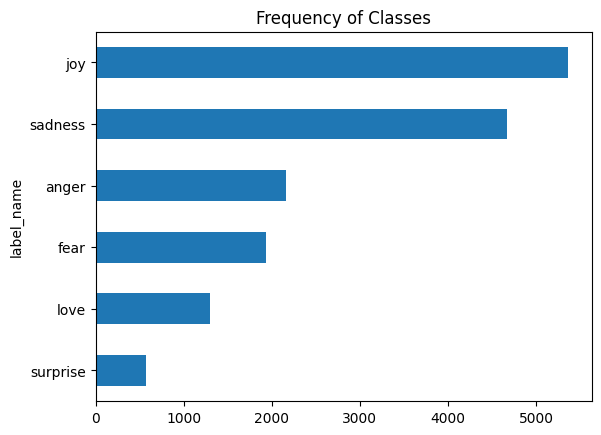

In [ ]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency of Classes')
plt.show

## **How Long Are Our Tweets?**

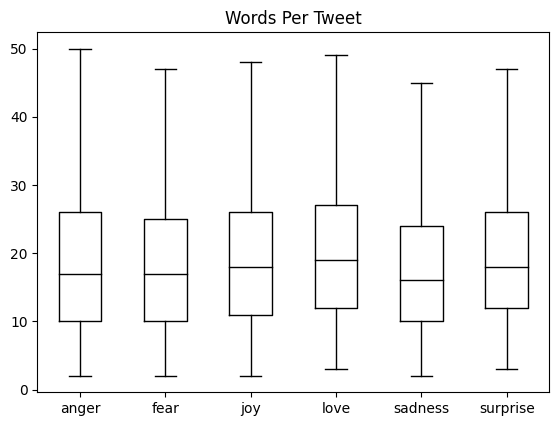

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
#since we don't need the dataframe format anymore

emotions.reset_format()

Transformer models have a amaximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size
is **512 tokens**, which amounts to a few paragraphs of text.From the plot we see that for each emotion, most tweets are around 15 words long
and the longest tweets are well below DistilBERT’s maximum context size. Texts that
are longer than a model’s context size need to be truncated, which can lead to a loss in
performance if the truncated text contains crucial information.

## **From Texts to Tokens**

### **Subword Tokenization**

 Hugging Transformers provides a convenient AutoTokenizer class that allows to quickly load
the tokenizer associated with a pretrained model—its from_pretrained()
method, providing the ID of a model on the Hub or a local file path.

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The AutoTokenizer class belongs to a larger set of “auto” classes whose job is to auto‐
matically retrieve the model’s configuration, pretrained weights, or vocabulary from
the name of the checkpoint. Which allows to quickly switch between models. To load the specific class manually the DistilBERT tokenizer can be used.

In [ ]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### **Tokenizing the Whole Dataset**

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)


This function applies the tokenizer to a batch of examples; padding=True will pad the
examples with zeros to the size of the longest one in a batch, and truncation=True
will truncate the examples to the model’s maximum context size.

In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [ ]:
emotions_encoded['train'][0]

{'text': 'i didnt feel humiliated',
 'label': 0,
 'input_ids': [101,
  1045,
  2134,
  2102,
  2514,
  26608,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

##**Training a Text Classifier**

In [ ]:
import tensorflow as tf

In [ ]:
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


The AutoModel class converts the token encodings to embeddings, and then feeds
them through the encoder stack to return the hidden states.

In [ ]:
text = "this is a text"
inputs = tokenizer(text, return_tensors="tf")
tf_outputs = tf_model(**inputs)
tf_last_hidden_states = tf_outputs.last_hidden_state
print(tf_last_hidden_states.shape)

(1, 6, 768)


In [ ]:
inputs = {k:v for k,v in inputs.items()}
with tf.GradientTape() as tape:
  tf_outputs = tf_model(**inputs)

print(tf_outputs)

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.25353596, -0.10910153,  0.07590435, ..., -0.10544109,
          0.22571146,  0.46151623],
        [-0.7153948 , -0.27420935, -0.09535272, ..., -0.35967818,
          0.5174309 ,  0.34503347],
        [-0.41001028, -0.21950054,  0.18502766, ..., -0.013592  ,
          0.16068193,  1.0421513 ],
        [-0.25232577, -0.02537901,  0.24724036, ..., -0.1637187 ,
          0.08648916,  1.0516171 ],
        [-0.05699529, -0.10572439,  0.06622371, ...,  0.05841233,
          0.10335301,  0.29708248],
        [ 0.91840863,  0.15769121, -0.41051984, ...,  0.15086707,
         -0.73267955, -0.15724523]]], dtype=float32)>, hidden_states=None, attentions=None)


In [ ]:
tf_outputs.last_hidden_state.shape

TensorShape([1, 6, 768])

In [ ]:
hidden_states = tf_outputs.last_hidden_state
cls_hidden_state = hidden_states[:, 0, :]
print(cls_hidden_state.shape)

(1, 768)


Structure of Hidden States
Shape: <br>
The hidden states are typically represented as a tensor with the shape **[batch_size, sequence_length, hidden_size]**.
batch_size: The number of input sequences processed in parallel. <br>
sequence_length: The length of each input sequence (after padding if necessary). <br>
hidden_size: The dimensionality of the hidden states, which is the same as the embedding size

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs in the appropriate format
    inputs = {k: tf.convert_to_tensor(v) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    last_hidden_state = tf_model(inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:, 0].numpy()}

In [ ]:
emotions_encoded.set_format(type='tensorflow', columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
emotions_hidden = emotions_encoded.map(lambda batch: extract_hidden_states(batch), batched=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [ ]:
#Creating a feature matrix

import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

In [ ]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,3.894266,6.681997,0
1,-3.535715,5.395240,0
2,4.948750,3.327229,3
3,-2.596606,3.220514,2
4,-3.575659,3.340405,3


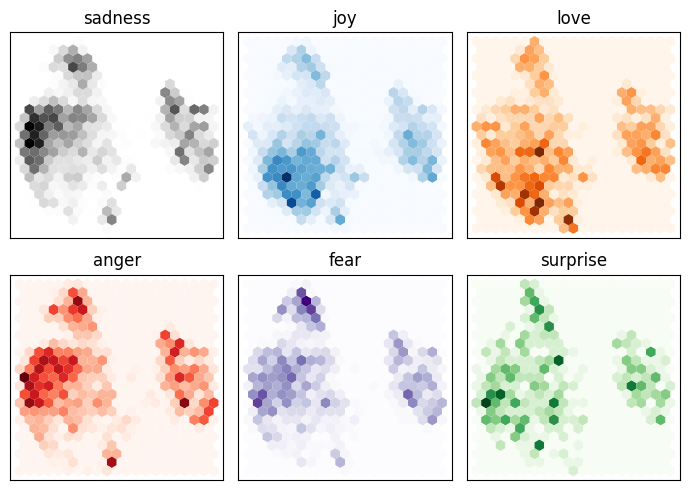

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

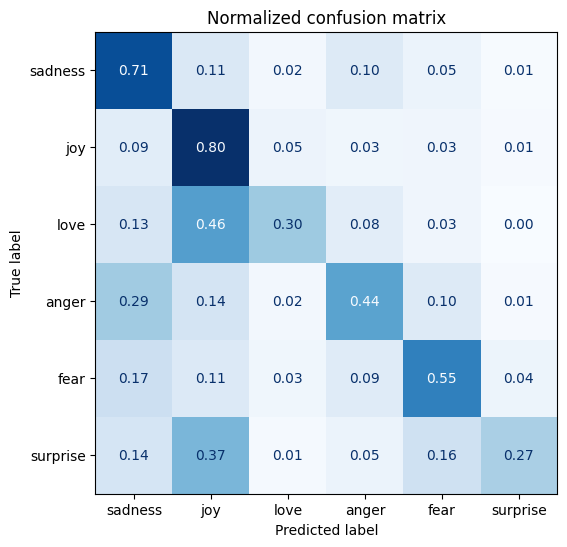

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

### **Fine-Tuning Transfomers**

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
batch_size = 64
num_labels =6

In [ ]:
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
columns=tokenizer_columns, label_cols=["label"], shuffle=True,
batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
columns=tokenizer_columns, label_cols=["label"], shuffle=False,
batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
tf_model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=tf.metrics.SparseCategoricalAccuracy())
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

In [ ]:
predictions = tf_model.predict(tf_eval_dataset)
y_preds = np.argmax(predictions['logits'], axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_true = np.concatenate([y for x, y in tf_eval_dataset], axis=0)

In [ ]:
accuracy_score(y_true, y_preds)

0.9385

In [ ]:
f1_score(y_true, y_preds, average="weighted")

0.9386838926444401

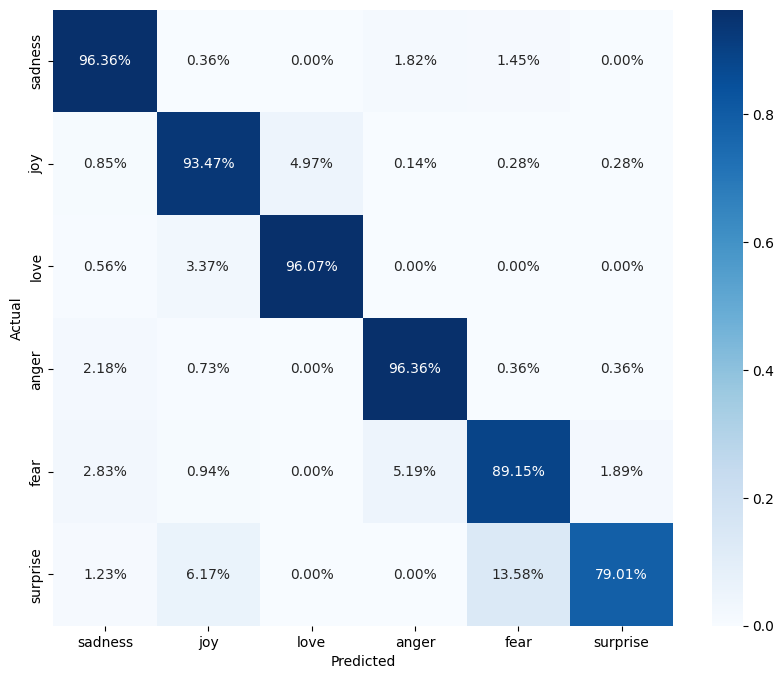

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Assuming labels are known, otherwise extract from the dataset
labels = tf_train_dataset.element_spec[1].label.names if 'label' in tf_train_dataset.element_spec else emotions['train'].features['label'].names
plot_confusion_matrix(y_preds, y_true, labels)


### **ERROR ANALYSIS**

### **Different Approach**

```
import numpy as np
import pandas as pd
import tensorflow as tf

# Define a function to perform forward pass with labels
def forward_pass_with_label(inputs, labels):
    # Place all input tensors on the same device as the model
    inputs = {k: tf.convert_to_tensor(v) for k, v in inputs.items() if k in tokenizer.model_input_names}
    
    # Forward pass through the model
    with tf.device(device):
        output = model(inputs)
    
    # Compute loss
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(
        labels, output.logits
    )
    
    # Convert predicted labels to numpy array
    pred_label = tf.argmax(output.logits, axis=-1).numpy()
    
    return {"loss": loss.numpy(), "predicted_label": pred_label}

# Map function to compute losses and predictions
def map_forward_pass_with_label(inputs, labels):
    results = forward_pass_with_label(inputs, labels)
    return {"loss": results["loss"], "predicted_label": results["predicted_label"]}

# Assuming tf_eval_dataset is already prepared and structured similarly to emotions_encoded
# Compute loss values and predictions
losses = []
predicted_labels = []

for batch_inputs, batch_labels in tf_eval_dataset:
    results = map_forward_pass_with_label(batch_inputs, batch_labels)
    losses.extend(results["loss"])
    predicted_labels.extend(results["predicted_label"])

# Convert to pandas DataFrame
df_test = pd.DataFrame({
    "loss": losses,
    "predicted_label": predicted_labels,
    "label": y_true  # Assuming y_true is already defined
})

df_test["label"] = df_test["label"].apply(label_int2str)  # Convert label integers to strings
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)  # Convert predicted labels to strings

# Sort DataFrame by loss in descending order and select top 10
df_top_losses = df_test.sort_values("loss", ascending=False).head(10)

df_top_losses```



In [ ]:
df_top_losses.head()

,loss,predicted_label,label
652,1.988004,surprise,sadness
1686,1.979630,love,sadness
46,1.977979,love,sadness
1874,1.977762,love,sadness
1725,1.973827,love,sadness


In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,loss,predicted_label,label
652,1.988004,surprise,sadness
1686,1.979630,love,sadness
46,1.977979,love,sadness
1874,1.977762,love,sadness
1725,1.973827,love,sadness
507,1.972175,love,sadness
1460,1.971845,love,sadness
562,1.971642,love,sadness
1764,1.971204,love,sadness
172,1.970637,love,sadness


**Original Approach from the book**

In [ ]:
def forward_pass_with_label(inputs, labels, model):
    # Forward pass through the model
    output = model(inputs)

    # Compute loss
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(
        labels, output.logits
    )

    # Predicted labels
    pred_label = tf.argmax(output.logits, axis=-1)

    return {"loss": loss, "predicted_label": pred_label}

In [ ]:
# Convert our dataset back to tensors
emotions_encoded.set_format("tensorflow",
columns=["input_ids", "attention_mask", "label"])
# Compute loss values
def forward_pass_with_label_partial(batch, model=model): # Added model as a default parameter
    inputs = {k: v for k, v in batch.items() if k in tokenizer.model_input_names}
    labels = batch["label"]
    return forward_pass_with_label(inputs, labels, model) # Pass labels and model to the original function

emotions_encoded["validation"] = emotions_encoded["validation"].map(
forward_pass_with_label_partial, batched=True, batch_size=16) # Use the partial function

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
.apply(label_int2str))

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
652,i would end up feeling rejected and feeling li...,sadness,surprise,1.988004
1686,i feel this is entirely in vain,sadness,love,1.979630
46,i feel so discontent with this decision,sadness,love,1.977979
1874,i didn t know that i would feel so completely ...,sadness,love,1.977762
1725,i feel really dumb and stupid for doing this,sadness,love,1.973827
507,i always feel so inadequate,sadness,love,1.972175
1460,i end up feeling lonely,sadness,love,1.971846
562,i hated feeling dumb,sadness,love,1.971642
1764,i would feel really dumb,sadness,love,1.971204
172,i just feel really listless right now,sadness,love,1.970637
